# **Week 15: Data Analysis**

Please refer to the textbook: "[Python for Data Analysis](https://wesmckinney.com/book/)" by Wes McKinney for details of this topic on Chapter 13

In [ ]:
# start by importing NumPy and pandas
import numpy as np
import pandas as pd
import seaborn as sns

### **15.1 Bitly Data from 1.USA.gov**
In 2011, the URL shortening service Bitly partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil.


In [ ]:
# Access the raw data here: https://bit.ly/3HbPOjE
# Create a variable to save the URL string
# This file is in JSON format
#定义了一个变量 path，用于保存数据文件的 URL 字符串。
path = "/content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/example.txt"

In [ ]:
# Upload the example.txt file
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
# using json module to load the data
# [json.loads(line) for line in f] -> iterates over each line in the file (f);逐行读取文件中的内容并将其转换为 Python 对象
# applies json.loads() to convert each line from JSON format to a Python object;整个列表推导式的结果是一个包含所有 Python 对象的列表，被赋值给 records 变量
# collects these objects into a list named records
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [ ]:
# object records is now a list of Python dictionary
#通过 records[0] 可以查看列表中的第一个元素，即第一行的 JSON 数据转换而来的字典
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

#### **Counting Time Zones in Pure Python**
finding the time zones that **occur most often** in the dataset (***the tz field***)

用纯 Python 计算时区

查找数据集中最常出现的时区（tz 字段）

In [ ]:
# Extract a list of time zones
#这是一个列表推导式，用于从 records 列表中提取每个字典的 'tz' 键对应的值（时区信息）
#对 time_zones 列表的切片操作，取出前 15 个元素
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:15]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong']

In [ ]:
# Produce a count by time zone - harder way
# using dictionary to store counts
# 'counts[x] += 1' -> If an element is already present in the dictionary, it increments its count by one
#定义了一个函数 get_counts，它接受一个参数 sequence，表示输入的序列
#counts = {} 创建一个空字典 counts，用于存储每个元素的计数。
#for x in sequence: 遍历输入序列中的每个元素，用变量 x 代表当前元素。
#if x in counts: 检查当前元素 x 是否已经存在于字典 counts 中。
#如果元素 x 已经在字典中，执行 counts[x] += 1，将对应元素的计数加一。
#如果元素 x 不在字典中，执行 counts[x] = 1，将元素添加到字典，并将计数初始化为 1
#获得一个字典，其中包含每个时区出现的次数。这是一种手动计数的方法
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
# get the time zone count data
#查看 counts 字典来了解每个时区的计数
counts = get_counts(time_zones)
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [ ]:
# Accessing single element
#访问字典 counts 中特定键 'Asia/Hong_Kong' 对应的值，即获取该时区出现的次数
counts['Asia/Hong_Kong']

10

In [ ]:
# Numbers of time zone in records
#len() 函数返回列表的长度，即列表中元素的个数
#len(time_zones) 返回了 time_zones 列表中时区的数量，表示数据集中包含了多少个时区
len(time_zones)

3440

In [ ]:
# Define a top_counts() function -> to get top 10 time zones and their counts
# Output as a tuple
#这段代码定义了一个名为 top_counts 的函数，该函数接受一个字典 count_dict（包含时区计数信息）和一个可选参数 n，默认为 10。
#函数的作用是返回计数最高的前 n 个时区及其计数，输出格式为元组的列表。

def top_counts(count_dict, n=10):
  #创建了一个包含元组的列表，每个元组中包含了时区计数和时区名称。这里使用了字典的 items() 方法来遍历字典的键值对
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    #对列表进行排序。默认情况下，排序将按照元组中的第一个元素（计数）进行升序排序
    value_key_pairs.sort()
    #返回排序后列表的后 n 个元素，即最大的 n 个元素
    return value_key_pairs[-n:]

In [ ]:
# top ten time zones
#top_counts在上面定义了前十名
#counts在前四格代码那里，是计数
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [ ]:
# simpler way
#这段代码使用 Python 的 collections 模块中的 Counter 类，提供了一种更简便的方式来计算时区的出现次数，并获取计数最高的前 10 个时区及其计数
from collections import Counter#导入了 Counter 类
#Counter 类创建了一个计数对象，其中 time_zones 是包含时区信息的列表
counts = Counter(time_zones)
#调用 most_common(10) 方法，返回一个包含计数最高的前 10 个元素的列表。每个元素都是一个元组，包含元素值和对应的计数
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#### **Counting Time Zones with pandas**

用 pandas 计算时区

In [ ]:
# Transform the records object to a pandas DataFrame
#用 pd.DataFrame() 函数将 records 转换为 DataFrame，并将其赋值给变量 frame
#records在超级上面，是一个包含所有 Python 对象的列表，被赋值给 records 变量
frame = pd.DataFrame(records)
frame.head()#默认显示前 5 行。

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [ ]:
# basic information about the DataFrame
# frame.info() 方法提供了有关 DataFrame 的基本信息
#会输出如下信息：
#列名（Column names）： DataFrame 中每列的名称
#非空值计数（Non-Null Count）： 每列中非空值的数量。
#数据类型（Data Types）： 每列中元素的数据类型，例如整数、浮点数、字符串等。
#内存占用（Memory Usage）： DataFrame 占用的内存空间。
#这些信息可以帮助你快速了解数据的整体情况
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [ ]:
# look at the tz column
# frame['tz'] 选择了 'tz' 列，并通过 head() 方法显示了该列的前几行内容
frame['tz'].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [ ]:
# Count tz information
#用 value_counts() 方法，统计了 DataFrame 中 'tz' 列中每个时区出现的次数
tz_counts = frame['tz'].value_counts()
#显示了计数最高的前 10 个时区及其出现次数
tz_counts.head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [ ]:
# zooming in to time zone variable
#查看 DataFrame 中 'tz' 列的所有数据，即展示整个 'tz' 列的取值
frame['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [ ]:
# filling in NA with specific string
#这段代码用于处理 'tz' 列中的缺失值（NA/null）
#使用 fillna('NA') 方法，将 'tz' 列中的缺失值用字符串 'NA' 填充。这将创建一个新的 Series，命名为 clean_tz
clean_tz = frame['tz'].fillna('NA')
#将 clean_tz 中值为空字符串的部分（如果有的话），用字符串 'Unknown Time Zone' 替换
clean_tz[clean_tz == ''] = 'Unknown Time Zone'
#用 value_counts() 方法，统计填充和替换后的 'tz' 列中每个时区的出现次数，将结果存储在 tz_counts 中
tz_counts = clean_tz.value_counts()
#显示计数最高的前 10 个时区及其出现次数
tz_counts.head(10)
#得到了处理了缺失值和空字符串后的 'tz' 列中时区的计数信息。这种处理方式有助于更全面地分析时区分布情况，而不受缺失值的影响

America/New_York       1251
Unknown Time Zone       521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
NA                      120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

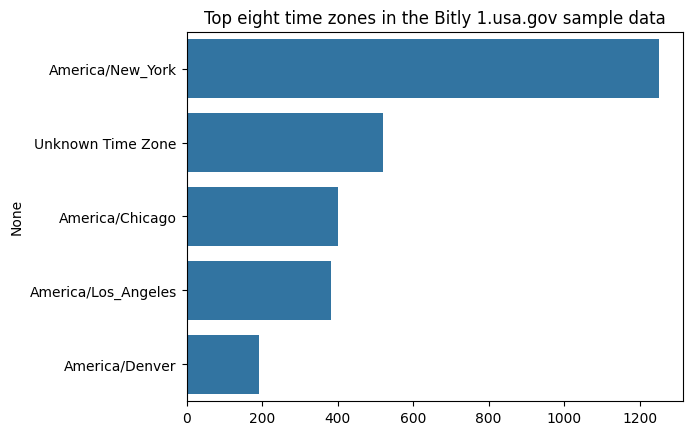

In [ ]:
#水平条形图，用于展示计数最高的前 8 个时区及其出现次数
# from matplotlib.pyplot import title
# make a horizontal bar plot
# default for head is 8 rows if no argument is provided
#tz_counts.head() 获取计数最高的前 8 个时区的信息，并将其存储在 subset 中
subset = tz_counts.head(8)#空着就是默认5
#sns.barplot() 创建一个水平条形图，其中 y 参数表示条形图的纵轴数据，即时区的名称，而 x 参数表示横轴数据，即各时区的计数
ax = sns.barplot(y = subset.index, x = subset.to_numpy())
#Bitly 1.usa.gov 样本数据中排名前八的时区
ax.set_title('Top eight time zones in the Bitly 1.usa.gov sample data');

#### **（可能有用）Working on other field in the Bitly dataset**

处理 Bitly 数据集中的其他字段

In [ ]:
# the "a" field contains information about the browser, device, or application
# used to perform the URL shortening
#访问 DataFrame 中的 'a' 列
frame['a'].head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [ ]:
# acessing single element
#访问 DataFrame 中 'a' 列的第五个元素(索引通常是从0开始的)
frame['a'][4]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [ ]:
# long line
#提取了 DataFrame 中 'a' 列的第五个元素（索引为4的元素）的前11个字符
frame['a'][4][:11]

'Mozilla/5.0'

In [ ]:
#frame['a'].dropna(): 这一部分首先选择 'a' 列，并使用 dropna() 方法删除其中的缺失值（NaN）
#[x.split() for x in ...]: 这是一个列表推导式，遍历 'a' 列中的每个非缺失值字符串 x，并使用 split() 方法将字符串按空格拆分为子列表
#pd.Series() 将列表转换为 Pandas Series
pd.Series([x.split() for x in frame['a'].dropna()])

0       [Mozilla/5.0, (Windows, NT, 6.1;, WOW64), Appl...
1                                [GoogleMaps/RochesterNY]
2       [Mozilla/4.0, (compatible;, MSIE, 8.0;, Window...
3       [Mozilla/5.0, (Macintosh;, Intel, Mac, OS, X, ...
4       [Mozilla/5.0, (Windows, NT, 6.1;, WOW64), Appl...
                              ...                        
3435    [Mozilla/4.0, (compatible;, MSIE, 9.0;, Window...
3436    [Mozilla/5.0, (Windows, NT, 5.1), AppleWebKit/...
3437                             [GoogleMaps/RochesterNY]
3438                                     [GoogleProducer]
3439    [Mozilla/4.0, (compatible;, MSIE, 8.0;, Window...
Length: 3440, dtype: object

In [ ]:
#对 'a' 列中的非缺失值进行拆分，并提取了每个字符串的第一个部分
# splitting the data and make another summary
# about browser capability
#[x.split()[0] for x in ...]: 这是一个列表推导式，遍历 'a' 列中的每个非缺失值字符串 x，使用 split() 方法将字符串按空格拆分
#pd.Series() 将列表转换为 Pandas Series，得到了一个包含每个非缺失值字符串的第一个部分的 Series
res = pd.Series([x.split()[0] for x in frame['a'].dropna()])
#res.head(8) 显示了这个新 Series 的前 8 个元素
res.head(8)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
dtype: object

In [ ]:
# make the count summary
#res Series 中每个唯一值的出现次数
#结果是一个包含了 'a' 列中非缺失值字符串的第一个部分的计数信息，显示了最常见的前 8 个元素及其出现次数
res.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

#### **We want to decompose the top time zones into Windows and non-Windows users.**
#我们希望将主要时区分解为 Windows 和非 Windows 用户。

In [ ]:
#这段代码首先过滤了 'a' 列中的缺失数据（NaN），并创建了一个新的 DataFrame cframe，其中包含了非缺失值的数据
# first filter out missing data
#frame['a'].notna(): 这一部分使用布尔索引，返回一个布尔 Series，其中为 True 的位置表示 'a' 列中对应的元素不是缺失值
#frame[frame['a'].notna()]: 这一部分使用布尔索引来过滤掉 'a' 列中的缺失值，得到一个新的 DataFrame cframe
#使用 copy() 方法创建 cframe 的副本，以避免后续的修改影响原始 DataFrame
cframe = frame[frame['a'].notna()].copy()
#cframe[['a']]: 最后，使用 [['a']] 提取 cframe 中的 'a' 列，并显示这一列的数据。
cframe[['a']]

,a
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,GoogleMaps/RochesterNY
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557,GoogleMaps/RochesterNY
3558,GoogleProducer


In [ ]:
#这段代码计算了每行是否为 Windows 操作系统，并将结果作为一个新列添加到 DataFrame cframe
# compute a count value for whether or not each row is Windows
# adding as a new column
#str.contains('Windows') 方法检查 'a' 列中的每个字符串是否包含 'Windows
#np.where(...): 根据条件返回相应的值。如果 'a' 列中的字符串包含 'Windows'，则返回 'Windows'，否则返回 'Not Windows'
#cframe['os']: 创建一个新的列 'os'，并将上述计算结果添加到这一列中
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [ ]:
# groupby time zone and os column
# Create an intermediate by_tz_os object
#groupby() 方法，根据 'tz' 和 'os' 列对 DataFrame cframe 进行分组
by_tz_os = cframe.groupby(['tz', 'os'])

In [ ]:
# Using size() function to get count data
# this is a long format table -> vertically arranged
#调用 size() 函数，对 by_tz_os 对象中的每个分组计算其大小（即计数）
by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [ ]:
# 1. reshape by_tz_os.size() into Not Windows and Windows columns -> wide format
# horizontally arranged
# 2. fillna = 0
# 3. put into variable called agg_counts
#unstack() 方法，将 by_tz_os.size() 的长格式数据重塑为宽格式，其中 'os' 列中的不同取值（'Windows' 和 'Not Windows'）成为新的列。这样就创建了一个横向排列的表格
#使用 fillna(0) 方法，将可能存在的缺失值（NaN）填充为0
#将处理后的数据赋值给变量 agg_counts
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [ ]:
# Sum along the columns (axis = 1)
#agg_counts 表格沿着列（即横向）的和。具体而言，axis=1 参数指定了沿着列的方向求和。这意味着对于每一行，都会将该行中所有列的值相加
agg_counts.sum(axis = 1)

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64

In [ ]:
# select the top overall time zones
# computing the row counts with agg_counts.sum("axis=1")
# call argsort() to obtain an index array that can be used to sort in ascending order
#agg_counts 表格沿着列（即横向）的方向求和，得到每个时区的总计数
#argsort() 获取排序后的索引,该数组表示总计数的升序顺序
#选择总计数最高的前 10 个时区的索引
indexer = agg_counts.sum(axis = 1).argsort()
indexer.values[-10: ]

array([35, 78, 96, 59, 77, 15, 22, 12,  0, 29])

In [ ]:
# use the indexer to select the rows
# slice off the last 10 rows (largest values)
#agg_counts.take(indexer[-10:]): 使用 take() 方法，按照 indexer 数组的最后 10 个索引，选择了总计数最高的前 10 个时区对应的行
#count_subset 现在包含了总计数最高的前 10 个时区的计数数据
count_subset = agg_counts.take(indexer[-10: ])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [ ]:
# To get the sum
#使用 copy() 方法创建了 count_subset 的副本，以避免修改原始 DataFrame
count_subset_sum = count_subset.copy()
#在 count_subset_sum 中添加了一列 'Sum'，该列的值是每行的总和，使用 sum(axis=1) 沿着列的方向进行计算
count_subset_sum['Sum'] = count_subset_sum.sum(axis = 1)
#count_subset_sum 包含了 count_subset 表格的数据，并增加了一列 'Sum'，表示每个时区的总计数
count_subset_sum

os,Not Windows,Windows,Sum
tz,,,
America/Sao_Paulo,13.0,20.0,33.0
Europe/Madrid,16.0,19.0,35.0
Pacific/Honolulu,0.0,36.0,36.0
Asia/Tokyo,2.0,35.0,37.0
Europe/London,43.0,31.0,74.0
America/Denver,132.0,59.0,191.0
America/Los_Angeles,130.0,252.0,382.0
America/Chicago,115.0,285.0,400.0
,245.0,276.0,521.0


In [ ]:
# Display agg_counts content
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [ ]:
# Using pandas way
#使用 nlargest(10) 方法，找到总计数最高的前 10 个时区
#这个方法是一种更为简洁的方式来获取总计数最高的时区
agg_counts.sum(axis = 1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [ ]:
# Display count_subset content
# This is in stack format
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [ ]:
# Transform the data frame from wide to long format
# important for 4th question: -> reset_index() function
#stack() 方法将宽格式的表格转换为长格式。这一步将 'Windows' 和 'Not Windows' 列转移到行索引的最内层，创建了一个 MultiIndex
count_subset_stack = count_subset.stack()
#为转换后的 Series 分配一个名称为 'Total'
count_subset_stack.name = 'Total'
#使用 reset_index() 方法将 MultiIndex 转换为列，重新设置索引，从而得到最终的长格式表格
count_subset_stack = count_subset_stack.reset_index()
#结果是一个包含 'tz'、'os' 和 'Total' 列的表格，其中 'Total' 列包含了相应 'tz' 和 'os' 组合的总计数
count_subset_stack.head(10)

,tz,os,Total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


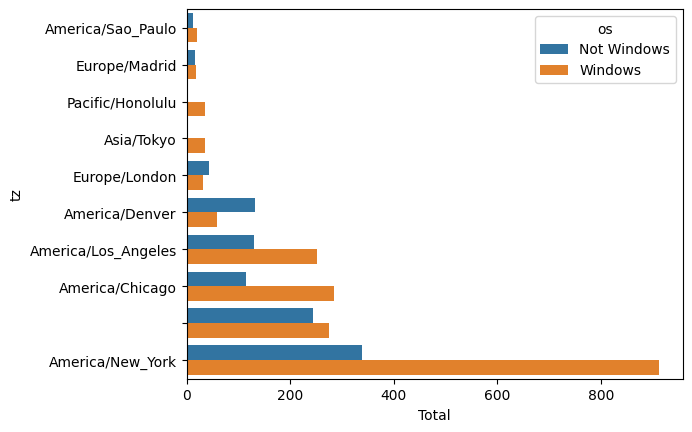

In [ ]:
#创建了一个分组的条形图，其中横坐标是 'Total' 列的计数，纵坐标是 'tz' 列的数据，不同颜色表示不同的操作系统
# plotted in a grouped bar plot
#hue='os': 通过 'os' 列的不同取值进行分组，每个组对应一个颜色
#使用 count_subset_stack 表格中的数据
sns.barplot(x = 'Total', y = 'tz', hue = 'os', data = count_subset_stack);

In [ ]:
#这个操作的目的是为了将每个时区内的计数数据标准化为相对比例，使得每个时区内的操作系统组合的总和为1
# normalize the group percentages to sum = 1
#定义了一个函数 norm_total，该函数接受一个分组 group，并在该分组上进行标准化处理
#在每个分组内，计算 'Total' 列的相对比例，将结果存储在一个新的列 'normed_total' 中
def norm_total(group):
    group["normed_total"] = group["Total"] / group["Total"].sum()
    return group
#使用 groupby 方法，按照 'tz' 列对 count_subset_stack 表格进行分组
#group_keys=False 参数表示不将 'tz' 列的值作为索引。然后，对每个分组应用 norm_total 函数，得到标准化处理后的结果，最后将所有分组的结果组合成一个新的 DataFrame res
res = count_subset_stack.groupby('tz', group_keys=False).apply(norm_total)
res.head()

,tz,os,Total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000


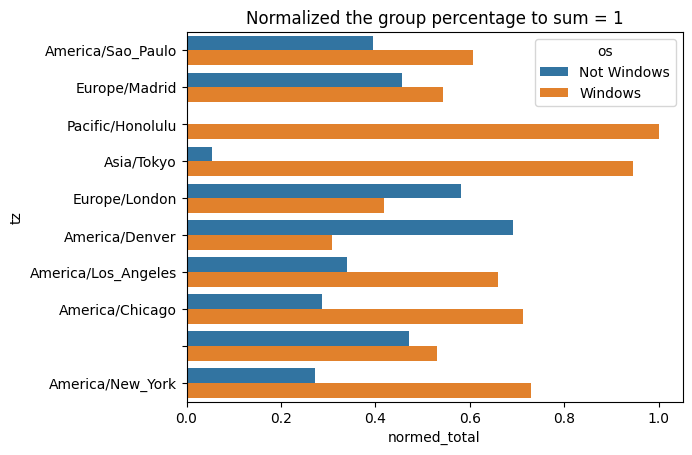

In [ ]:
# Barplot
#data=res: 使用标准化处理后的 res 表格中的数据
ax = sns.barplot(x = 'normed_total', y = 'tz', hue = 'os', data = res)
#设置图表标题
ax.set_title('Normalized the group percentage to sum = 1');

# **15.2 US Baby Names 1880–2022**
The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through 2022 (**access date**: **2024-01-16 11:51 +8:00**).

In [ ]:
# Upload the yob2022 files
from google.colab import files
files.upload()

{}

In [ ]:
# Move the yob2022.txt file to your own folder
#这个命令会将文件从一个位置移动到另一个位置
!mv /content/yob2022.txt /content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/yob2022.txt

mv: cannot stat '/content/yob2022.txt': No such file or directory


In [ ]:
# Using the Unix head command to look at the first 10 lines of one of the files前 10 行
# This is in comma-separated format
!head -n 10 /content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/yob2022.txt

Olivia,F,16573
Emma,F,14435
Charlotte,F,12891
Amelia,F,12333
Sophia,F,12310
Isabella,F,11662
Ava,F,11039
Mia,F,11018
Evelyn,F,9289
Luna,F,8922


In [ ]:
# Load the yob2022.txt into a DataFrame with pandas.read_csv
#read_csv 函数将名为 yob2022.txt 的文件加载到了一个 DataFrame 中，并指定了列名为 ['name', 'sex', 'births']
names2022 = pd.read_csv('/content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/yob2022.txt',
                        names = ['name', 'sex', 'births'])
names2022

,name,sex,births
0,Olivia,F,16573
1,Emma,F,14435
2,Charlotte,F,12891
3,Amelia,F,12333
4,Sophia,F,12310
...,...,...,...
31910,Zuberi,M,5
31911,Zydn,M,5
31912,Zylon,M,5
31913,Zymeer,M,5


In [ ]:
# use groupby to calculate sum of Female and Male baby in 2022
#groupby('sex'): 使用 'sex' 列进行分组
#['births'].sum(): 对分组后的 'births' 列进行求和，得到每个性别的总出生数。
#结果是一个包含两个性别（Female 和 Male）的 Series，其中包含了各自的总出生数
names2022.groupby('sex')['births'].sum()

sex
F    1628730
M    1733166
Name: births, dtype: int64

# **<font color='red'>（重要）Upload all the yob files from 1880 to 2022**  :)

In [ ]:
# important for final question
# assemble all of the YOB data into a single DataFrame
# add a year field
# using pandas.concat() function

#这个代码块通过循环迭代读取每年的YOB文件，为每个DataFrame添加了一个名为'year'的列，表示该数据属于的年份
#使用pd.concat函数将所有数据拼接成一个单一的DataFrame names，其中ignore_index=True表示重新索引结果DataFrame
pieces = []
for year in range(1880, 2023):
    path = f"/content/drive/MyDrive/STQD6014_ArusPerdana/_SEM1_20232024/Data/YOB/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame['year'] = year
    pieces.append(frame)

#names DataFrame 包含了从1880年到2022年的所有YOB数据，每一行都包括姓名（'name'）、性别（'sex'）、出生数（'births'）以及年份（'year'）信息
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
# Display names DataFrame
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [ ]:
# Aggregate the names DataFrame by year
#用 pivot_table 方法，将 'births' 列作为值，'year' 列作为索引，'sex' 列作为列，然后使用 sum 聚合函数计算每年男女婴儿的总出生数
total_births = names.pivot_table('births', index = 'year',
                                 columns = 'sex', aggfunc=sum)
#结果是一个包含每年男女婴儿总出生数的 DataFrame total_births，其中行表示年份，列表示性别。total_births.tail() 显示了DataFrame的最后几行
total_births.tail()

sex,F,M
year,,
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588
2021,1635800,1743913
2022,1628730,1733166


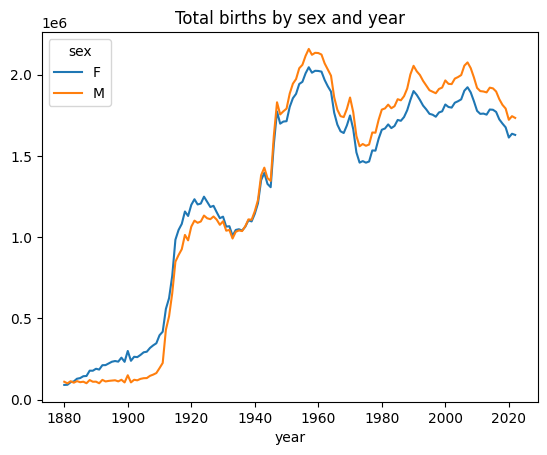

In [ ]:
# Plot a line plot
#创建了一个线图，展示了每年男女婴儿的总出生数
#plot 方法进行可视化，这里是生成线图, title 参数设置图表的标题
total_births.plot(title = 'Total births by sex and year');

# ***Our observation:***

1. More number of female births < 1930
2. More number of male births > 1950

#我们的观察：
1. 1930 年以下女性出生人数增加
2. 男性出生人数在1950后更多

Read this [interesting article](https://www.pewresearch.org/short-reads/2022/08/31/global-population-skews-male-but-un-projects-parity-between-sexes-by-2050/) about ***global population***

In [ ]:
#这个操作的目的是计算每个名字相对于其所在年份和性别的总出生数的比例，并将结果存储在新的 'prop' 列中
# Calculate fraction of babies given each name relative to the total number of births
#定义了一个函数 add_prop，该函数接受一个分组 group，并在该分组上计算每个名字的出生比例
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()#每个分组内，计算每个名字的出生比例，并将结果存储在一个新的列 'prop' 中
    return group
#groupby 方法，按照 'year' 和 'sex' 列对 names 进行分组。group_keys=False 参数表示不将 'year' 和 'sex' 列的值作为索引
#然后，对每个分组应用 add_prop 函数，得到添加了 'prop' 列的 DataFrame
names = names.groupby(['year', 'sex'], group_keys = False).apply(add_prop)

In [ ]:
# Display names DataFrame
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000003
2085154,Zydn,M,5,2022,0.000003
2085155,Zylon,M,5,2022,0.000003
2085156,Zymeer,M,5,2022,0.000003


In [ ]:
#这行代码进行了一种合理性检查，以确保在每个年份和性别组内，'prop' 列的值之和等于 1。这样可以验证在每个组内，所有名字的出生比例是否被正确计算
# Perform sanity check to ensure the prop column sums to 1 within all the groups
#用 groupby 方法按照 'year' 和 'sex' 列对 names 进行分组，然后计算每个分组内 'prop' 列的总和。如果在每个组内，'prop' 列的总和都接近于 1，那么可以认为计算是正确的
names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

In [ ]:
#这段代码定义了一个函数 get_top1000，并使用 Pandas 的 groupby 和 apply 方法将其应用于 DataFrame names，以获取每个性别和年份组合的前 1000 个名字。
# Extract the top 1,000 names for each sex/year combination
#定义了一个函数 get_top1000，该函数接受一个分组 group，并在该分组上按照 'births' 列降序排序，然后选择前 1000 个名字
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

# Create intermediate file
#使用 groupby 方法，按照 'year' 和 'sex' 列对 names 进行分组，创建了一个 grouped 中间文件
grouped = names.groupby(['year', 'sex'])

# Get top 1000 data
#对每个分组应用 get_top1000 函数，得到每个性别和年份组合的前 1000 个名字
top1K = grouped.apply(get_top1000)

# Display top few rows
#显示 top1K 数据的前 10 行，以查看结果
top1K.head(10)

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015539
         8     Bertha   F    1320  1880  0.014506
         9      Sarah   F    1288  1880  0.014155

In [ ]:
# Drop the group index
#这行代码使用 reset_index 方法，将 top1K DataFrame 中的分组索引进行重置，同时保留默认的整数索引。这样可以取消之前设置的分组索引，将结果重新转换为常规的 DataFrame 形式
#drop=True 表示丢弃之前的分组索引，使用默认的整数索引。这个操作的目的是将 top1K 转换为不包含分组索引的标准 DataFrame 形式
top1K = top1K.reset_index(drop=True)
top1K

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
285871,Atharv,M,223,2022,0.000129
285872,Imran,M,223,2022,0.000129
285873,Asaiah,M,223,2022,0.000129
285874,Kalel,M,222,2022,0.000128


### **Analyzing Naming Trends**

In [ ]:
#这两行代码根据性别将前1000个名字分割成男孩和女孩的两个部分
# split the top one thousand names into the boy and girl portions
#从 top1K DataFrame 中筛选出性别为男性（'M'）的行，将结果存储在新的 DataFrame boys
boys = top1K[top1K['sex'] == 'M']
#从 top1K DataFrame 中筛选出性别为女性（'F'）的行，将结果存储在新的 DataFrame girls
girls= top1K[top1K['sex'] == 'F']

In [ ]:
#这段代码使用 Pandas 的 pivot_table 方法，以年份为索引、名字为列，计算每个名字在每年的总出生数
# form a pivot table of the total number of births by year and name
#使用 pivot_table 方法，将 'births' 列作为值，'year' 列作为索引，'name' 列作为列，然后使用 sum 聚合函数计算每个名字在每年的总出生数
total_births = top1K.pivot_table('births', index='year',
                                 columns = 'name', aggfunc = sum)
#结果是一个包含每年每个名字的总出生数的 DataFrame total_births，其中行表示年份，列表示名字。
total_births.head(10)

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,12.0,6.0,14.0,48.0,NaN,38.0,NaN,NaN,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,...,8.0,NaN,20.0,52.0,NaN,43.0,NaN,NaN,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,...,23.0,NaN,28.0,46.0,NaN,33.0,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,...,23.0,7.0,30.0,42.0,NaN,45.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1880 to 2022
Columns: 7322 entries, Aaden to Zyon
dtypes: float64(7322)
memory usage: 8.0 MB


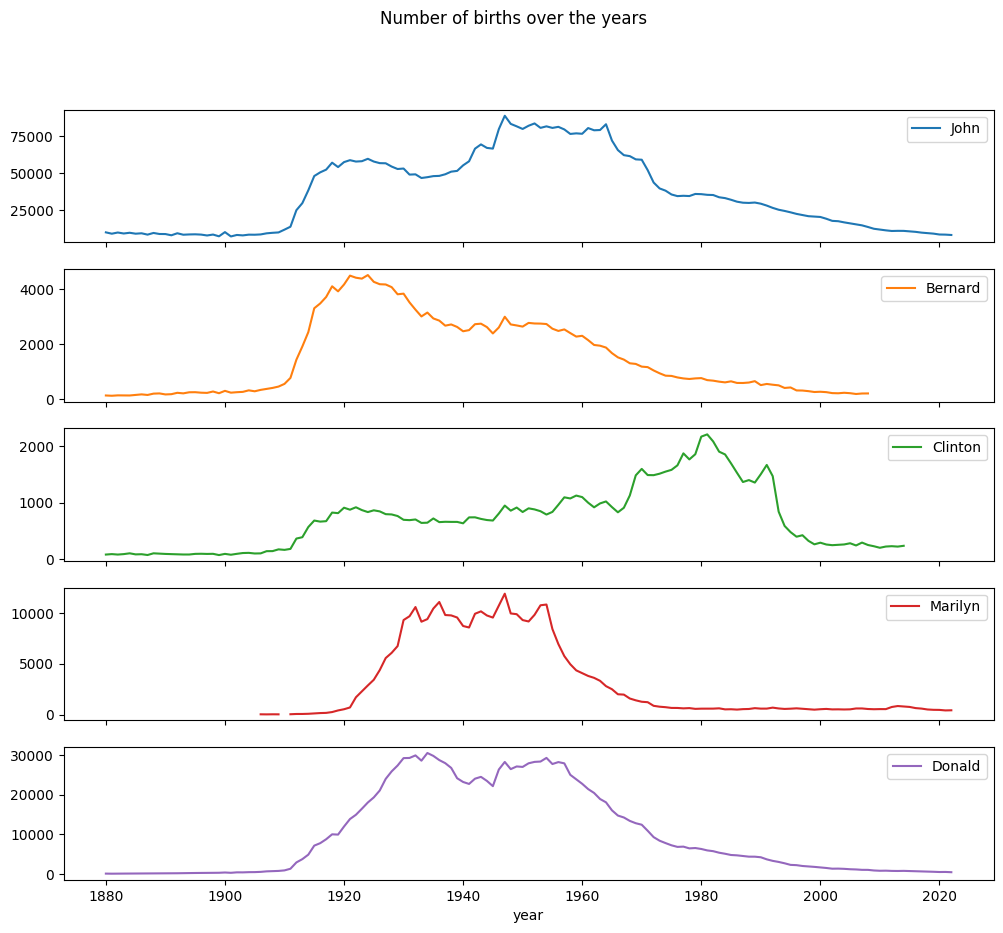

In [ ]:
#这段代码分别输出了 total_births DataFrame 的基本信息，然后选择了名字为 'John'、'Bernard'、'Clinton'、'Marilyn' 和 'Donald' 的子集，
#并使用 plot 方法绘制了这些名字随着年份变化的折线图
# Get total births info
#total_births.info(): 输出了 total_births DataFrame 的基本信息，包括非空值数量、列的数据类型等
total_births.info()

# Subset of names
#选择了名字为 'John'、'Bernard'、'Clinton'、'Marilyn' 和 'Donald' 的子集，存储在 DataFrame subset 中
subset = total_births[['John', 'Bernard', 'Clinton', 'Marilyn', 'Donald']]

# Plot line plot
#plot 方法，绘制了子集中每个名字随着年份变化的折线图。subplots=True 表示每个名字都在独立的子图中，
#figsize=(12, 10) 控制图的大小，title='Number of births over the years' 设置了图表的标题
subset.plot(subplots = True, figsize = (12, 10),
            title = 'Number of births over the years');

# ***Our observation:***

We might conclude that these names have grown out of favor with the American population. **But is that right?**

我们可能会得出这样的结论：这些名字已经不再受到美国民众的青睐。 但这是对的吗？

# **Measuring the increase in naming diversity**

sex          F         M
year                    
1880  1.000000  0.997375
1881  1.000000  1.000000
1882  0.998702  0.995646
1883  0.997596  0.998566
1884  0.993156  0.994539
1885  0.992251  0.995501
1886  0.989504  0.995035
1887  0.988279  0.996697
1888  0.984240  0.992429
1889  0.984061  0.994981
1890  0.982566  0.992749
1891  0.982181  0.993725
1892  0.979745  0.988815
1893  0.980000  0.991729
1894  0.978571  0.989047
1895  0.975478  0.989071
1896  0.975655  0.988040
1897  0.976558  0.989349
1898  0.972810  0.987236
1899  0.975170  0.990114


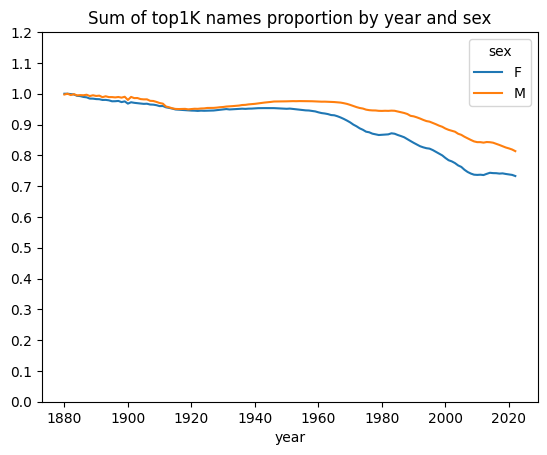

In [ ]:
#这段代码首先使用 pivot_table 方法，以年份为索引、性别为列，计算了每年前 1000 个最受欢迎名字的出生比例之和，
#这个操作的目的是观察每年前 1000 个最受欢迎名字在总出生人数中所占的比例随着时间的变化趋势

#并将结果存储在 DataFrame table 中。然后，使用 plot 方法绘制了年份和性别的折线图。
# Extract proportion of births represented by the top 1,000 most popular names
# aggregate year and sex
#用 pivot_table 方法，以年份为索引、性别为列，计算了每年前 1000 个最受欢迎名字的出生比例之和，并将结果存储在 DataFrame table 中
table = top1K.pivot_table('prop', index ='year',
                          columns = 'sex', aggfunc = sum)
#打印了 table DataFrame 的前 20 行
print(table.head(20))

# Line plot by year and sex
#用 plot 方法，绘制了年份和性别的折线图。yticks=np.linspace(0, 1.2, 13) 设置了 y 轴刻度的范围, 0到1.2，有13个刻度
table.plot(title = 'Sum of top1K names proportion by year and sex',
           yticks  =np.linspace(0, 1.2, 13));

# ***Our observation:***

there appears to be increasing name diversity (decreasing total proportion in the top one thousand).

名称多样性似乎在增加（前一千名中的总比例下降）。

# ***Boy names that became girl names (and vice versa)***

1. Another fun trend is looking at names that were more popular with one gender earlier in the sample but have become preferred as a name for the other gender over time.
2. One example is the name Lesley or Leslie.

男孩的名字变成了女孩的名字（反之亦然）
1. 另一个有趣的趋势是查看样本中早期更受一种性别欢迎的名字，但随着时间的推移，这些名字已成为另一种性别的首选名字。
2. 一个例子是莱斯利（Lesley）或莱斯利（Leslie）这个名字。

In [ ]:
#这个操作的目的是找到包含 "Lesl" 的名字，并分析它们在每年的相对频率。
# Extract unique names from top1000
#从 top1K 中提取了所有唯一的名字，存储在名为 all_names 的 Pandas Series 中
all_names = pd.Series(top1K['name'].unique())

# Extract unique names contain "Lesl"
#从 all_names 中筛选包含 "Lesl" 的名字，存储在名为 lesley_like 的 Pandas Series 中
lesley_like = all_names[all_names.str.contains('Lesl')]

# Display lesley_like content
#显示了包含 "Lesl" 的名字的内容
lesley_like

# Extract just lesley_like names
#从 top1K 中筛选出仅包含在 lesley_like 中的名字，存储在名为 filtered 的 DataFrame 中
filtered = top1K[top1K['name'].isin(lesley_like)]

# Compute sum births grouped by name to see their relative frequencies
#计算了每个名字的出生数总和，通过 groupby 和 sum 聚合
filtered.groupby('name')['births'].sum()

# aggregate by sex and year, and normalize within year
#使用 pivot_table 方法，按年份、性别聚合数据，并计算了每年每个名字的相对频率
table = filtered.pivot_table('births', index = 'year',
                             columns = 'sex', aggfunc = sum)

# Display table content
table

# Normalize within year
#将表格 table 内部每一行的值规范化，使得每一年的值之和等于1
#table.sum(axis=1) 计算了每一行的和，axis='index' 表示沿着行的方向进行操作
table = table.div(table.sum(axis = 1), axis = 'index')
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2018,1.000000,NaN
2019,1.000000,NaN
2020,1.000000,NaN


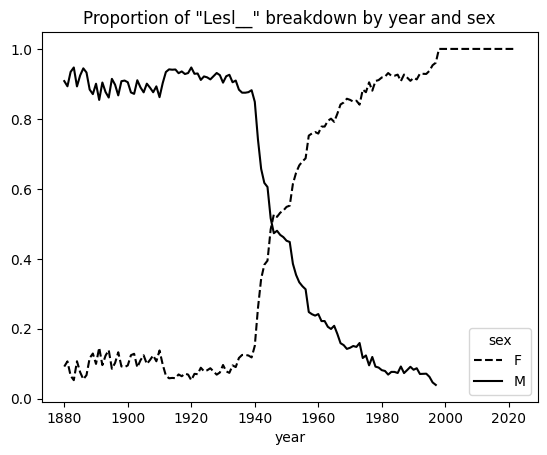

In [ ]:
#这段代码使用 plot 方法绘制了关于 "Lesl__" 名字的相对频率的折线图，根据性别进行了分组
# line plot breakdown by sex over time for "Lesl__"
#使用 plot 方法绘制了折线图。通过 style 参数，选择了男性（'M'）使用实线（'k-'），女性（'F'）使用虚线（'k--'）
ax = table.plot(style = {"M": 'k-', "F": 'k--'})
#set_title 方法设置了图表的标题
ax.set_title('Proportion of "Lesl__" breakdown by year and sex');

# Thank you for hanging there with me over the past 7 weeks.

# I hope you've gained valuable knowledge during this time!

# I'll see you all when I see you all :)

# **Best of luck on your final exam!**